In [1]:
import sys
import numpy as np
import open3d as o3d
import cv2 as cv
import matplotlib.pyplot as plt
import pandas as pd
import IPython
from PIL import Image
sys.path.insert(1, "../Assignment_2.1")
from A21 import computePoseCameraFrame,computeTransformation

In [216]:
pose = computePoseCameraFrame(0)
num_points = np.shape(pose)[0]
colours = np.zeros([num_points, 3])
pcd_net = o3d.geometry.PointCloud()
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(pose[:,:3])
pcd.colors = o3d.utility.Vector3dVector(colours)
downpcd = pcd.voxel_down_sample(voxel_size=1)
# o3d.visualization.draw_geometries([downpcd])
# o3d.io.write_image("../dataset/imgs/0.png", downpcd)
path = "../dataset/imgs/o3d/76.png"
vis = o3d.visualization.Visualizer()
vis.create_window()
vis.add_geometry(downpcd)
# vis.update_geometry()
vis.poll_events()
vis.update_renderer()
vis.capture_screen_image(path)
vis.destroy_window()
img = cv.imread(path)
img = cv.bitwise_not(img)
cv.imwrite("../dataset/imgs/cv/76.png", img)

True

In [2]:
poses = computePoseCameraFrame(0)
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(poses[:,:3])
# print (np.asarray(pcd.points))
o3d.visualization.draw_geometries([pcd])
pcd1 = np.round(np.asarray(pcd.points))
print (pcd1)

[[ -6.  -2.  52.]
 [-13.  -3.  79.]
 [-13.  -3.  79.]
 ...
 [  1.   2.   4.]
 [  1.   2.   4.]
 [  1.   2.   4.]]


In [3]:
pcd_df = pd.DataFrame(data=pcd1,columns=['x','y','z'])
pcd_df.drop_duplicates(subset = ["y","x","z"],inplace=True)
pts = pcd_df.groupby(['x','z']).count().index
counts = pcd_df.groupby(['x','z']).count()
print (counts)

             y
x     z       
-74.0  30.0  1
-72.0 -36.0  1
      -34.0  5
      -33.0  1
-71.0 -38.0  1
...         ..
 73.0  23.0  2
       24.0  1
 74.0  17.0  1
       23.0  2
 75.0  23.0  1

[5894 rows x 1 columns]


In [4]:
pts.values

array([(-74.0, 30.0), (-72.0, -36.0), (-72.0, -34.0), ..., (74.0, 17.0),
       (74.0, 23.0), (75.0, 23.0)], dtype=object)

In [5]:
pcd_new = pd.DataFrame({'pts':pts.values,'count':counts['y']})
pcd_new.reset_index(drop=True,inplace=True)
pcd_new

,pts,count
0,"(-74.0, 30.0)",1
1,"(-72.0, -36.0)",1
2,"(-72.0, -34.0)",5
3,"(-72.0, -33.0)",1
4,"(-71.0, -38.0)",1
...,...,...
5889,"(73.0, 23.0)",2
5890,"(73.0, 24.0)",1
5891,"(74.0, 17.0)",1
5892,"(74.0, 23.0)",2


In [6]:
pcd_new[['count']].describe()

,count
count,5894.000000
mean,1.436206
std,0.939500
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,7.000000


In [7]:
pts_array = pcd_new['pts'].values
pts_array[0]

(-74.0, 30.0)

In [8]:
img = np.zeros((200,200,1), np.uint8)
for i in range(len(pts_array)):
    ind = (pts_array[i][0] + 100,pts_array[i][1]+ 100)
    county = pcd_new.iloc[i,1]
    if (county>1):
#         print ("I am probably an obstacle!")
        img[int(ind[0])][int(ind[1])] = 1

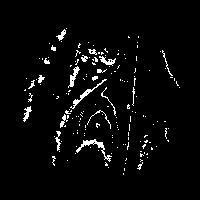

In [9]:
_,ret = cv.imencode('.jpg', img*255) 
i = IPython.display.Image(data=ret)
IPython.display.display(i)

In [18]:
img = cv.resize(img,(700,700))
im = cv.imwrite('grid.png',img*255)

In [20]:
for i in range(77):
    poses = computePoseCameraFrame(i)
    pcd = o3d.geometry.PointCloud()
    pcd.points = o3d.utility.Vector3dVector(poses[:,:3])
    pcd1 = np.round(np.asarray(pcd.points))
    pcd_df = pd.DataFrame(data=pcd1,columns=['x','y','z'])
    pcd_df.drop_duplicates(subset = ["y","x","z"],inplace=True)
    pts = pcd_df.groupby(['x','z']).count().index
    counts = pcd_df.groupby(['x','z']).count()
    pcd_new = pd.DataFrame({'pts':pts.values,'count':counts['y']})
    pcd_new.reset_index(drop=True,inplace=True)
    pts_array = pcd_new['pts'].values
    img = np.zeros((200,200,1), np.uint8)
    for j in range(len(pts_array)):
        ind = (pts_array[j][0] + 100,pts_array[j][1]+ 100)
        county = pcd_new.iloc[j,1]
        if (county>1):
    #         print ("I am probably an obstacle!")
            img[int(ind[0])][int(ind[1])] = 1
    img = cv.resize(img,(700,700))
    filename = '../dataset/imgs/cv/img'+str(i)+'.png'
    im = cv.imwrite(filename,img*255)